In [ ]:
!pip install pandas scikit-learn matplotlib seaborn --quiet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_file_path = '/content/Credit Card Fraud Detection.zip'

# Define the directory where you want to extract the contents
extract_dir = '/content/extracted_files/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the extracted directory
extracted_files = os.listdir(extract_dir)
print(f"Extracted Files: {extracted_files}")

Extracted Files: ['creditcard.csv']


In [ ]:
# Load the dataset
df = pd.read_csv('/content/extracted_files/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Sample Phase

In [ ]:
# Take a 20% sample of the dataset
sampled_data = df.sample(frac=0.2, random_state=42)

# Check the shape of the sampled dataset
print(f'Sampled Dataset Shape: {sampled_data.shape}')

# Display the first few rows of the sampled data
sampled_data.head()

Sampled Dataset Shape: (56961, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


# Explore

In [ ]:
# Descriptive statistics
print("Descriptive statistics of numerical features:")
print(sampled_data.describe())

Descriptive statistics of numerical features:
                Time            V1            V2            V3            V4  \
count   56961.000000  56961.000000  56961.000000  56961.000000  56961.000000   
mean    94899.898246     -0.003636      0.001519      0.003689      0.005814   
std     47487.189441      1.960147      1.629984      1.523094      1.415932   
min         0.000000    -34.148234    -48.060856    -33.680984     -5.560118   
25%     54324.000000     -0.921985     -0.600888     -0.888734     -0.845894   
50%     84672.000000      0.018794      0.064370      0.182761     -0.015873   
75%    139390.000000      1.316077      0.802564      1.033631      0.749586   
max    172787.000000      2.439207     21.467203      9.382558     12.699542   

                 V5            V6            V7            V8            V9  \
count  56961.000000  56961.000000  56961.000000  56961.000000  56961.000000   
mean      -0.003953      0.002397     -0.004395      0.001600     -0.003849

In [ ]:
# Check for missing values
print(f'Missing values per column: \n{sampled_data.isnull().sum()}')


Missing values per column: 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Explore the class distribution (fraudulent vs. non-fraudulent transactions)
class_counts = sampled_data['Class'].value_counts(normalize=True)
print(f'Class distribution: \n{class_counts}')

Class distribution: 
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


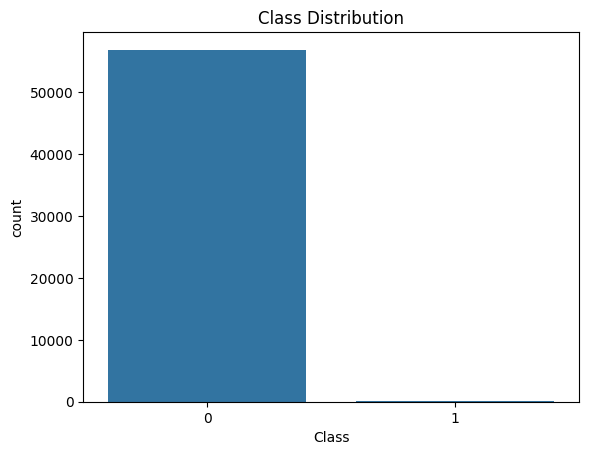

In [ ]:
# Plot the class distribution
sns.countplot(x='Class', data=sampled_data)
plt.title('Class Distribution')
plt.show()

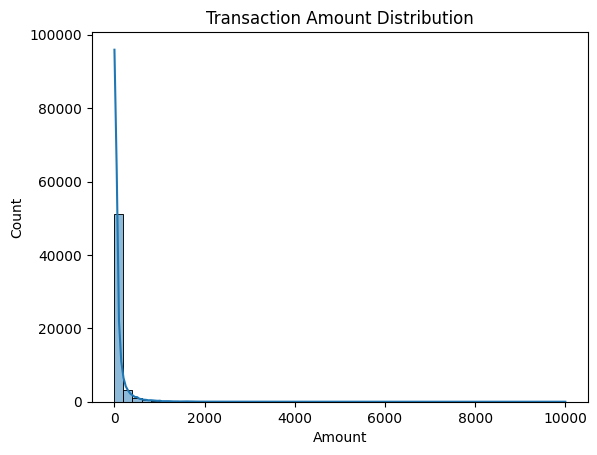

In [ ]:
# Visualize the distribution of the 'Amount' feature
sns.histplot(sampled_data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

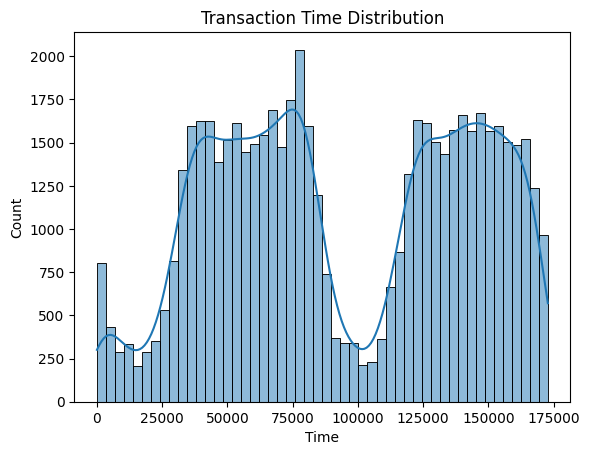

In [ ]:
# Visualize the distribution of the 'Time' feature
sns.histplot(sampled_data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()

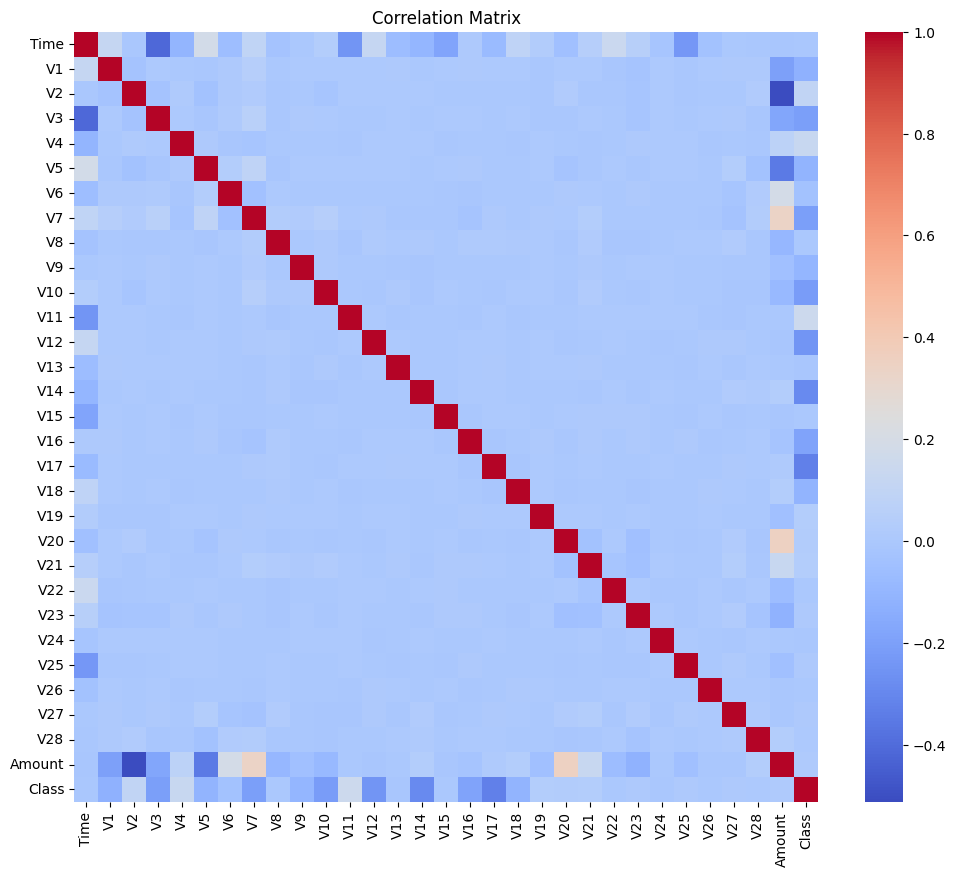

In [ ]:
# Correlation matrix to check relationships between features
corr_matrix = sampled_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


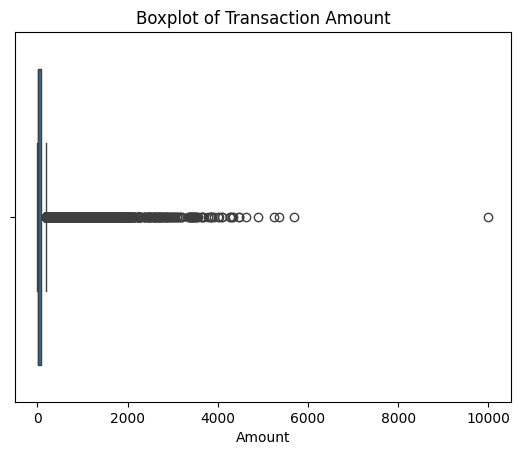

In [ ]:
# Boxplot to check for outliers in 'Amount'
sns.boxplot(x=sampled_data['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

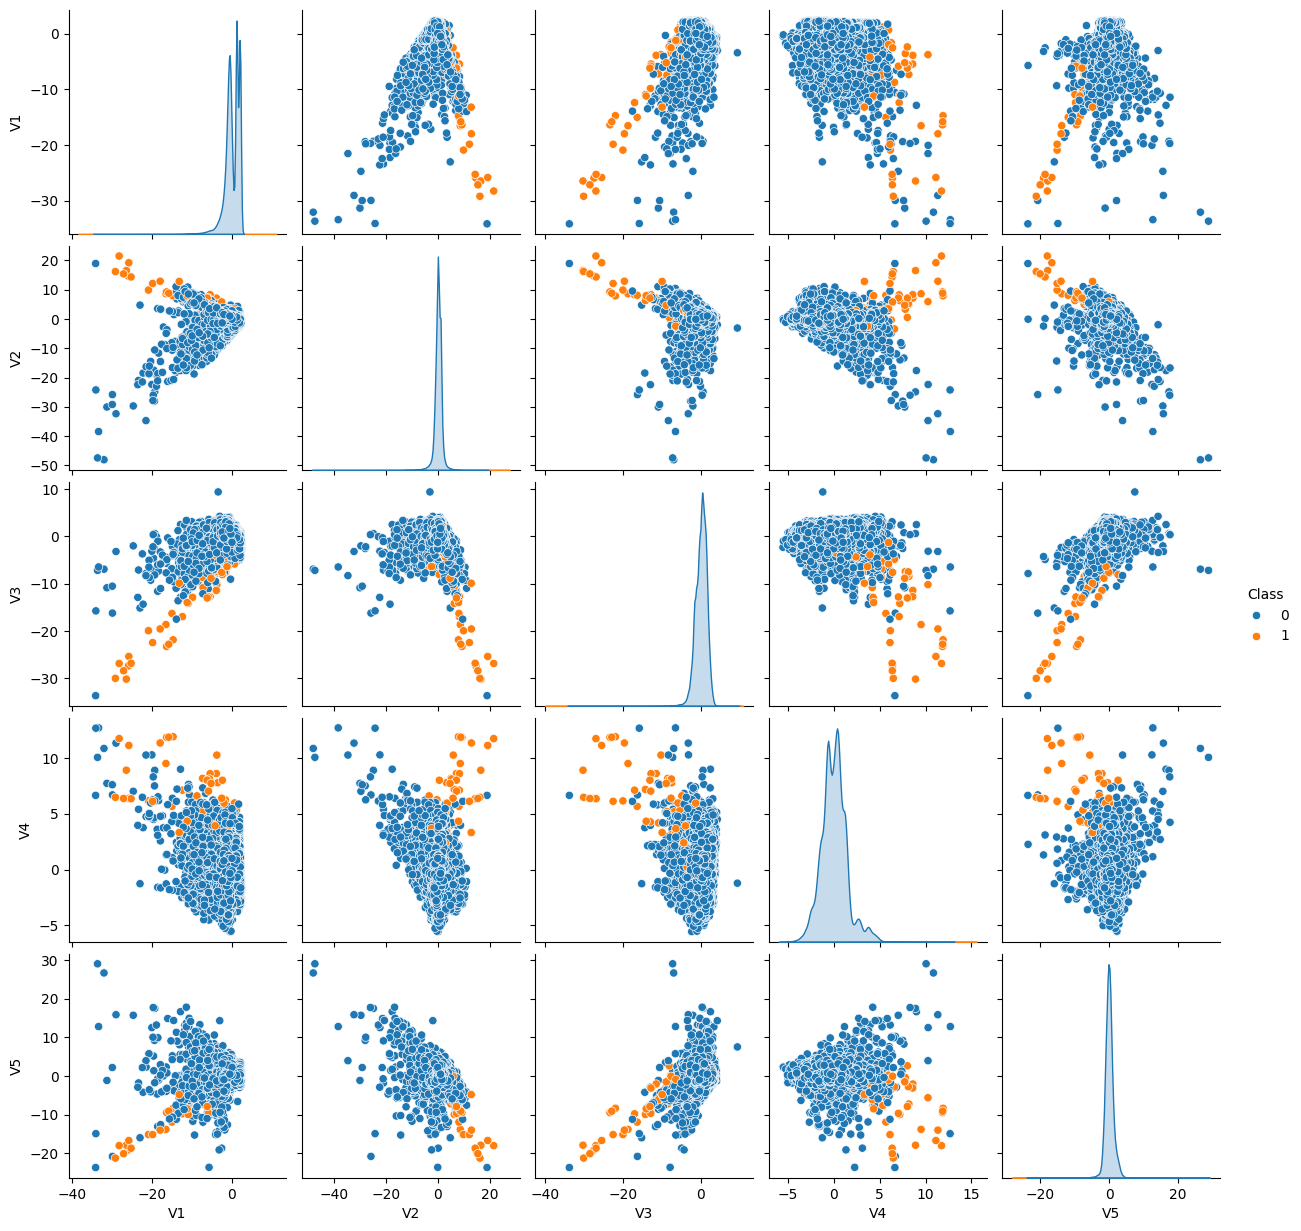

In [ ]:
# Pairplot to see relationships between variables (only a subset of features for clarity)
sns.pairplot(sampled_data[['V1', 'V2', 'V3', 'V4', 'V5', 'Class']], hue='Class')
plt.show()

# MODIFY

In [ ]:
# Normalize the 'Amount' and 'Time' columns
scaler = StandardScaler()
sampled_data['Scaled_Amount'] = scaler.fit_transform(sampled_data[['Amount']])
sampled_data['Scaled_Time'] = scaler.fit_transform(sampled_data[['Time']])

In [ ]:
# Drop the original 'Amount' and 'Time' columns
sampled_data.drop(['Amount', 'Time'], axis=1, inplace=True)

In [ ]:
# Handle class imbalance by downsampling the majority class (non-fraudulent transactions)
fraud = sampled_data[sampled_data['Class'] == 1]
non_fraud = sampled_data[sampled_data['Class'] == 0]

In [ ]:
# Downsample the non-fraudulent transactions to match the number of fraudulent transactions
non_fraud_downsampled = non_fraud.sample(len(fraud), random_state=42)

In [ ]:
# Concatenate the downsampled non-fraudulent transactions with the fraudulent transactions
balanced_data = pd.concat([non_fraud_downsampled, fraud])


In [ ]:
# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


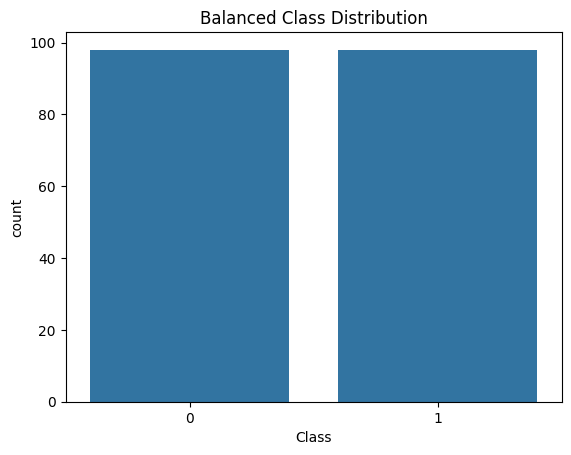

In [ ]:
# Check the new class distribution after balancing
sns.countplot(x='Class', data=balanced_data)
plt.title('Balanced Class Distribution')
plt.show()

In [ ]:
# Display the first few rows of the balanced data
balanced_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-2.377533,0.520539,-8.094139,8.005351,2.640750,-3.381586,-1.934372,0.562322,-3.104027,-3.051210,...,0.721100,2.661291,-0.508620,-0.401657,0.587611,0.500326,0.551760,1,-0.377696,-1.140484
1,-3.003459,2.096150,-0.487030,3.069453,-1.774329,0.251804,-4.328776,-2.425478,-0.985222,-3.995211,...,1.245648,-0.269241,0.537102,-0.220757,-0.059555,0.460710,-0.033551,1,-0.373345,-0.204665
2,0.744162,-0.959925,1.461952,1.700670,-1.676983,0.172864,-0.846866,0.294371,1.489122,-0.219149,...,0.518498,-0.257208,0.381641,0.327697,-0.188110,0.047853,0.072406,0,0.500133,-0.471813
3,-0.055960,-0.600189,1.559501,-1.614233,-0.499232,0.167348,-0.411174,-0.083233,-2.661390,1.600549,...,0.318659,-0.050715,-0.310420,-0.494614,-0.131539,0.015094,-0.088068,0,-0.273280,-0.479226
4,0.114965,0.766762,-0.494132,0.116772,0.868169,-0.477982,0.438496,0.063073,-0.186207,-0.159325,...,-0.706865,0.131405,0.600742,-0.604264,0.262938,0.099145,0.010810,1,-0.362512,0.982697


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = sampled_data.drop('Class', axis=1)
y = sampled_data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after applying SMOTE
print(f'Class distribution after SMOTE: {np.bincount(y_train_resampled)}')

Class distribution after SMOTE: [39804 39804]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction features (only interaction terms, no higher-order polynomial terms)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(sampled_data.drop('Class', axis=1))

# Convert to a DataFrame with new interaction feature names
interaction_features = poly.get_feature_names_out(input_features=sampled_data.drop('Class', axis=1).columns)
X_interactions_df = pd.DataFrame(X_interactions, columns=interaction_features)

# Add the target variable back to the dataset
X_interactions_df['Class'] = sampled_data['Class'].reset_index(drop=True)

# Display the new dataset with interaction features
X_interactions_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26 V28,V26 Scaled_Amount,V26 Scaled_Time,V27 V28,V27 Scaled_Amount,V27 Scaled_Time,V28 Scaled_Amount,V28 Scaled_Time,Scaled_Amount Scaled_Time,Class
0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,0.482571,-0.556432,0.520338,2.104979,-2.427163,2.269719,-1.253882,1.172546,-1.352014,1
1,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,-0.076186,-1.404300,0.796208,0.004183,0.077105,-0.043717,0.191914,-0.108811,-2.005656,0
2,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,-0.001077,0.057429,0.290706,0.000053,-0.002820,-0.014275,-0.001145,-0.005798,0.309269,0
3,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.000305,0.059241,-0.239933,-0.000459,0.089143,-0.361043,-0.000726,0.002942,-0.571132,0
4,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.012331,-0.066078,0.270716,0.005508,0.029514,-0.120916,0.026688,-0.109338,-0.585920,0


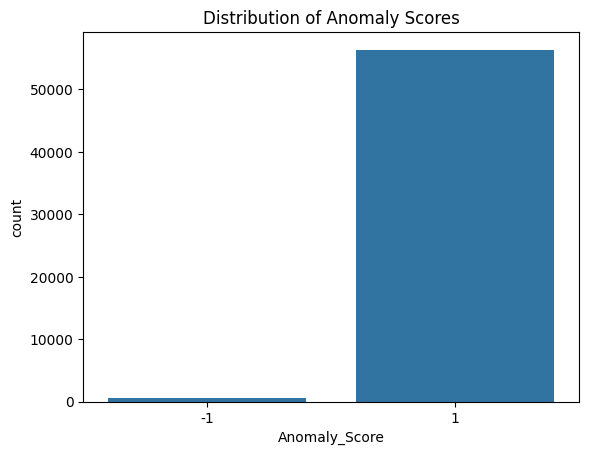

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


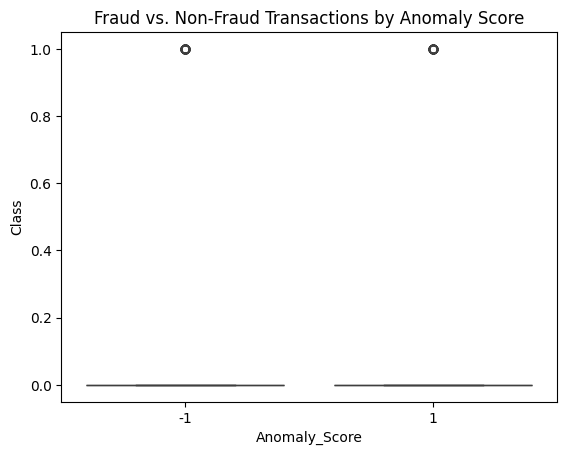

In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model and calculate anomaly scores
sampled_data['Anomaly_Score'] = iso_forest.fit_predict(sampled_data.drop('Class', axis=1))

# The Anomaly_Score column contains -1 for anomalies and 1 for normal points
# Add it to the dataset as a feature
sns.countplot(x='Anomaly_Score', data=sampled_data)
plt.title('Distribution of Anomaly Scores')
plt.show()

# Evaluate how anomalies correlate with fraud occurrences
sns.boxplot(x='Anomaly_Score', y='Class', data=sampled_data)
plt.title('Fraud vs. Non-Fraud Transactions by Anomaly Score')
plt.show()


# MODEL

In [ ]:
# Split the data into features (X) and target (y)
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the model using various metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
 [[28  0]
 [ 4 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.87      0.93        31

    accuracy                           0.93        59
   macro avg       0.94      0.94      0.93        59
weighted avg       0.94      0.93      0.93        59


ROC AUC Score: 0.9861751152073733


In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Evaluate model performance
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.87      0.93        31

    accuracy                           0.93        59
   macro avg       0.94      0.94      0.93        59
weighted avg       0.94      0.93      0.93        59

ROC AUC Score: 0.9677419354838709


# ASSESS

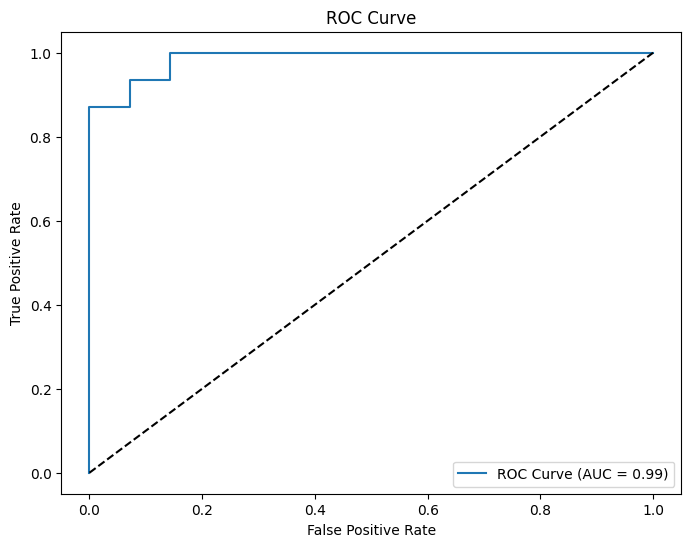

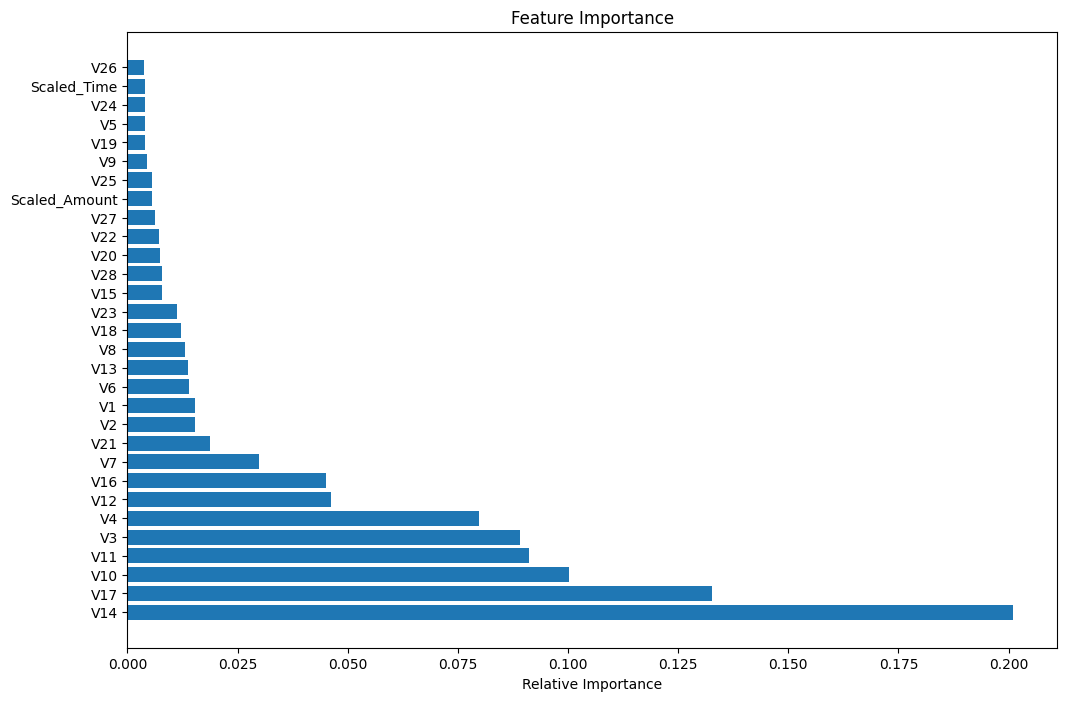

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature importance from the Random Forest model
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
